In [12]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt


In [16]:
def fetch_nasa_data(api_endpoint):
    try:
        # Send a GET request to the API endpoint
        response = requests.get(api_endpoint)
        response.raise_for_status()
        # Parse the response data (assuming JSON)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None
# Define the API endpoint for NASA data
api_endpoint = "https://data.nasa.gov/resource/gquh-watm.json"
data = fetch_nasa_data(api_endpoint)
print(data)

[{'center': 'NASA Kennedy Space Center', 'status': 'Application', 'case_number': 'KSC-12871', 'patent_number': '0', 'application_sn': '13/033,085', 'title': 'Polyimide Wire Insulation Repair System'}, {'center': 'NASA Ames Research Center', 'status': 'Issued', 'case_number': 'ARC-14048-1', 'patent_number': '5694939', 'application_sn': '08/543,093', 'title': 'Autogenic-Feedback Training Exercise Method & System', 'patent_expiration_date': '2015-10-03T00:00:00.000'}, {'center': 'NASA Ames Research Center', 'status': 'Issued', 'case_number': 'ARC-14231-1', 'patent_number': '6109270', 'application_sn': '09/017,519', 'title': 'Multimodality Instrument For Tissue Characterization', 'patent_expiration_date': '2017-02-04T00:00:00.000'}, {'center': 'NASA Ames Research Center', 'status': 'Issued', 'case_number': 'ARC-14231-2DIV', 'patent_number': '6976013', 'application_sn': '10/874,003', 'title': 'Metrics For Body Sensing System', 'patent_expiration_date': '2024-06-16T00:00:00.000'}, {'center':

In [17]:
#creating a DataFrame
df=pd.DataFrame(data)

In [18]:
df

,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,NaN
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03T00:00:00.000
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16T00:00:00.000
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000
...,...,...,...,...,...,...,...
995,NASA Glenn Research Center,Application,LEW-18923-1,NaN,"13/963,060",New Power Source For Deep Space Missions- Util...,2033-08-09T00:00:00.000
996,NASA Glenn Research Center,Application,LEW-18928-1,NaN,NaN,Pt-Ti-Si Simultaneous Ohmic Contacts to N- and...,NaN
997,NASA Glenn Research Center,Application,LEW-18934-1,NaN,"13/900,642",Conditionally Active Min-Max Limit Regulators,2033-05-23T00:00:00.000
998,NASA Glenn Research Center,Application,LEW-18939-1,NaN,"13/916,797","Magnetostrictive Alternator - Low cost, No mov...",2033-06-13T00:00:00.000


In [19]:
#Columns in the DataFrame
df.columns

Index(['center', 'status', 'case_number', 'patent_number', 'application_sn',
       'title', 'patent_expiration_date'],
      dtype='object')

In [ ]:
df.head(10)

In [17]:
def clean_data(data):
    df = pd.DataFrame(data)
    #Replacing NaN values in patent_number column of dataFRame to 'pending'
    df['patent_number'] = df['patent_number'].replace(np.NaN, 'pending')
    df['patent_expiration_date'] = pd.to_datetime(df['patent_expiration_date']).fillna(pd.Timestamp.now()).dt.date
    return df

df = clean_data(data)
df



,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,2024-08-01
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04
...,...,...,...,...,...,...,...
995,NASA Glenn Research Center,Application,LEW-18923-1,pending,"13/963,060",New Power Source For Deep Space Missions- Util...,2033-08-09
996,NASA Glenn Research Center,Application,LEW-18928-1,pending,NaN,Pt-Ti-Si Simultaneous Ohmic Contacts to N- and...,2024-08-01
997,NASA Glenn Research Center,Application,LEW-18934-1,pending,"13/900,642",Conditionally Active Min-Max Limit Regulators,2033-05-23
998,NASA Glenn Research Center,Application,LEW-18939-1,pending,"13/916,797","Magnetostrictive Alternator - Low cost, No mov...",2033-06-13


In [28]:
df


,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,2024-07-31
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04
...,...,...,...,...,...,...,...
995,NASA Glenn Research Center,Application,LEW-18923-1,pending,"13/963,060",New Power Source For Deep Space Missions- Util...,2033-08-09
996,NASA Glenn Research Center,Application,LEW-18928-1,pending,NaN,Pt-Ti-Si Simultaneous Ohmic Contacts to N- and...,2024-07-31
997,NASA Glenn Research Center,Application,LEW-18934-1,pending,"13/900,642",Conditionally Active Min-Max Limit Regulators,2033-05-23
998,NASA Glenn Research Center,Application,LEW-18939-1,pending,"13/916,797","Magnetostrictive Alternator - Low cost, No mov...",2033-06-13


In [52]:
def analyze_patents(df):
    unique_applications = df['application_sn'].nunique()
    # Dropping duplicate rows 
    df_cleaned = df.drop_duplicates(subset='application_sn', keep='first')
    # Adding a new column 'year' to the DataFrame from column 'patent_expiration_date'
    df_cleaned['year'] = pd.to_datetime(df_cleaned['patent_expiration_date']).dt.year
    return unique_applications, df_cleaned
print(f"Unique applications: {unique_applications}")
print(df_cleaned.head())


Unique applications: 994
                      center       status     case_number patent_number  \
0  NASA Kennedy Space Center  Application       KSC-12871             0   
1  NASA Ames Research Center       Issued     ARC-14048-1       5694939   
2  NASA Ames Research Center       Issued     ARC-14231-1       6109270   
3  NASA Ames Research Center       Issued  ARC-14231-2DIV       6976013   
4  NASA Ames Research Center       Issued     ARC-14231-3       6718196   

  application_sn                                              title  \
0     13/033,085            Polyimide Wire Insulation Repair System   
1     08/543,093  Autogenic-Feedback Training Exercise Method & ...   
2     09/017,519  Multimodality Instrument For Tissue Characteri...   
3     10/874,003                    Metrics For Body Sensing System   
4     09/652,299  Multimodality Instrument For Tissue Characteri...   

  patent_expiration_date  
0             2024-08-01  
1             2015-10-03  
2             20

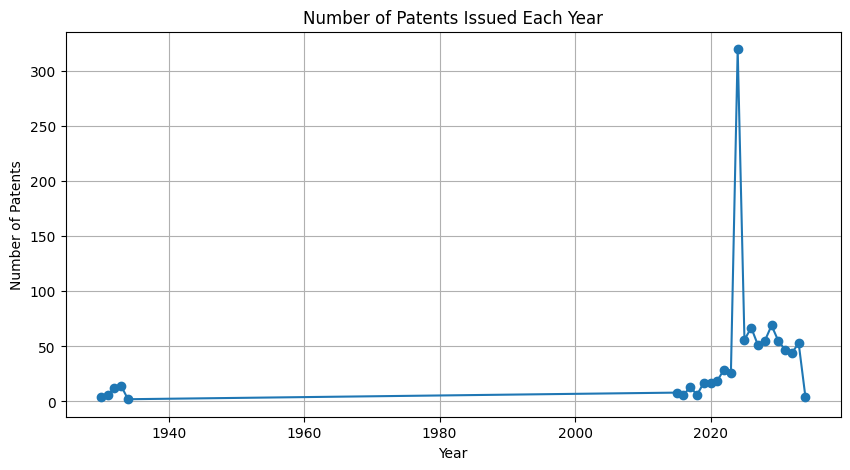

In [54]:
df_cleaned['year'] = pd.to_datetime(df_cleaned['patent_expiration_date']).dt.year

def plot_patents_by_year(df_cleaned):
    patents_count_by_year = df_cleaned['year'].value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    plt.plot(patents_count_by_year.index, patents_count_by_year.values, marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('Number of Patents')
    plt.title('Number of Patents Issued Each Year')
    plt.grid(True)
    plt.show()
plot_patents_by_year(df) 

In [74]:
# Identifying Patents with status of Issued and year <2025
def Patent_Granted(df):
 patent_granted  = df_cleaned[(df_cleaned['status']=='Issued') & (df_cleaned['year']< 2025)]
 return patent_granted
 
patent_granted_df = Patent_Granted(df_cleaned)

# Print the patents granted
print("Patents Granted:")
print(patent_granted_df)

Patents Granted:
                         center  status     case_number patent_number  \
1     NASA Ames Research Center  Issued     ARC-14048-1       5694939   
2     NASA Ames Research Center  Issued     ARC-14231-1       6109270   
3     NASA Ames Research Center  Issued  ARC-14231-2DIV       6976013   
4     NASA Ames Research Center  Issued     ARC-14231-3       6718196   
5     NASA Ames Research Center  Issued     ARC-14275-1       6445390   
..                          ...     ...             ...           ...   
825  NASA Glenn Research Center  Issued     LEW-17618-1       7015304   
836  NASA Glenn Research Center  Issued     LEW-17672-1       7261783   
839  NASA Glenn Research Center  Issued     LEW-17704-1       7250723   
857  NASA Glenn Research Center  Issued     LEW-17951-1       8545786   
869  NASA Glenn Research Center  Issued     LEW-18059-1       8242162   

    application_sn                                              title  \
1       08/543,093  Autogenic-Fee

In [63]:
#counting the no. of patents by year 


In [100]:
def patents_by_year(df):
    
  year_count = patent_granted_df['year'].value_counts().sort_index(ascending=False)    

  total_patents = year_count.sum()
  percentage_year = round((year_count/ total_patents)*100,2)
  return percentage_year,year_count
percentage_year, year_count = patents_by_year(df_cleaned)
patents_by_year
df_sum = pd.DataFrame({
    'Year': year_count.index,
    'Count': year_count.values,
    'Percentage': percentage_year.values
})
df_sum

,Year,Count,Percentage
0,2024,107,41.31
1,2023,26,10.04
2,2022,29,11.20
3,2021,19,7.34
4,2020,17,6.56
5,2019,17,6.56
6,2018,6,2.32
7,2017,13,5.02
8,2016,6,2.32
9,2015,8,3.09


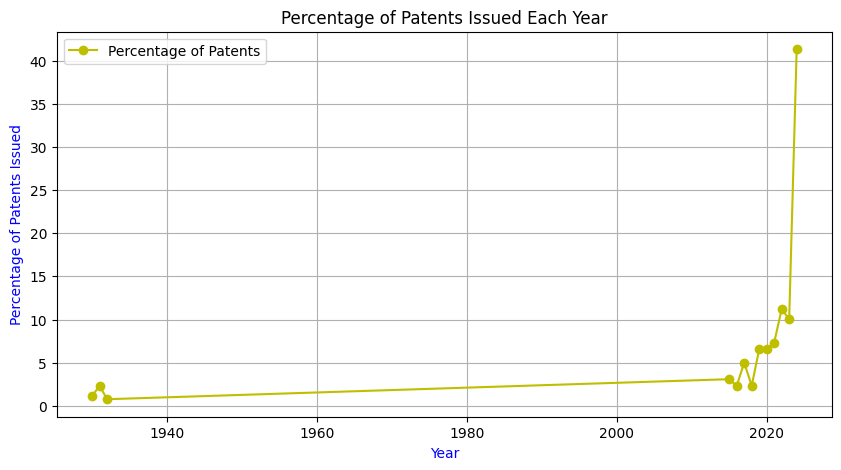

In [103]:
#Plotting line graph between year and Percentage of Patents Issued
def plotting_line_graph(df):
   
 plt.figure(figsize=(10, 5))

 plt.plot(df_sum['Year'], df_sum['Percentage'], marker='o', linestyle ='-',label='Percentage of Patents',color='y')
 plt.legend(loc='upper left')
 plt.xlabel('Year',color='b')
 plt.ylabel('Percentage of Patents Issued',color='b')
 plt.title('Percentage of Patents Issued Each Year')

 plt.grid(True)
 plt.show()
plotting_line_graph(df_cleaned)
#Analysis:There has been a sharp increase in the number of patents issued since 2019 to 2024

center
NASA Ames Research Center                138
NASA Armstrong Flight Research Center     21
NASA Glenn Research Center               210
NASA Goddard Space Flight Center         193
NASA Headquarters                          1
NASA Johnson Space Center                  1
NASA Kennedy Space Center                 87
NASA Langley Research Center             349
Name: count, dtype: int64


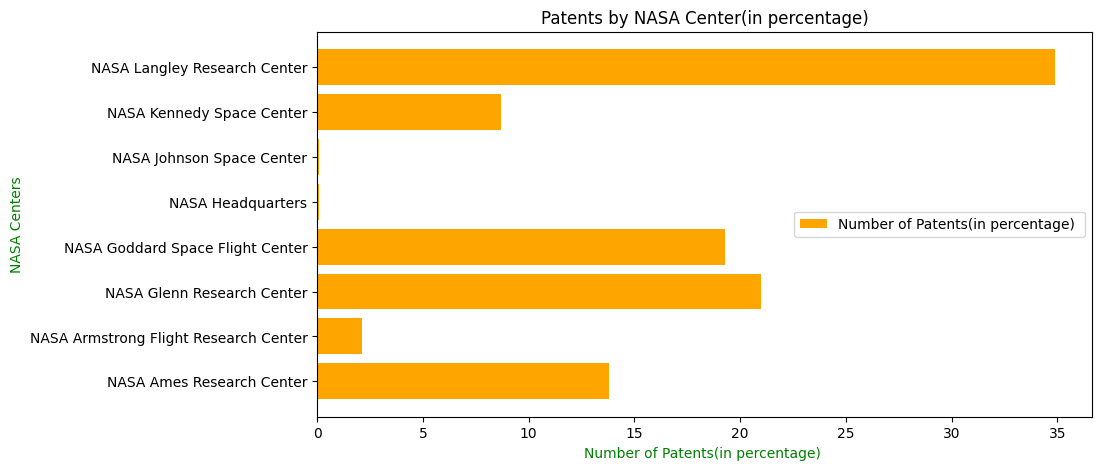

In [105]:
#To identify which centers have the most patents
# PLotting a horizontal bar graph for Patents by NASA Center(Percentage)
def Inventors(df):
 top_inventors = df_cleaned['center'].value_counts().sort_index()
 print(top_inventors)
 plt.figure(figsize=(10, 5))
 plt.barh(top_inventors.index, (top_inventors.values / top_inventors.sum()) * 100,label="Number of Patents(in percentage) ",color='orange')
 plt.legend(loc='center right')
 plt.title("Patents by NASA Center(in percentage)")
 plt.xlabel("Number of Patents(in percentage) ",color='g')

 plt.ylabel("NASA Centers",color='g')
 plt.show()
Inventors(df_cleaned)    
#NASA Langley Research center has been the top inventor and has contributed to 35% of total patents

In [73]:
#Patent status analysis


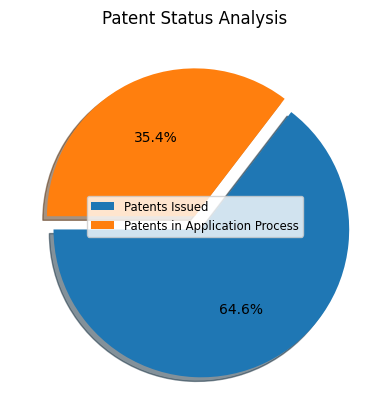

Patents Status:-- status
Issued         646
Application    354
Name: count, dtype: int64


In [113]:


def Patents_Status_Analysis(df): 
 patent_status_analysis=df['status'].value_counts()   
 exp = (0.1, 0)
 plt.pie(patent_status_analysis, autopct='%1.1f%%',startangle=180,explode=exp,shadow=True)
 plt.legend(labels=['Patents Issued', 'Patents in Application Process'], loc='center', fontsize='small')
 plt.title("Patent Status Analysis")
 plt.show()
 print("Patents Status:--",patent_status_analysis)
Patents_Status_Analysis(df_cleaned)

# 353 Patents are yet to be issued and are in process and 642 are the total issued patents


In [119]:
#Percentage of patents yet to be issued is 35.5%